- Previously we were using batch gradient for updating the parameters which cause memory inefficient and takes much time to train model

- thats why here we are loading or giving data in mini batches

### **Problem with this Mannual approach of code for mini batch**

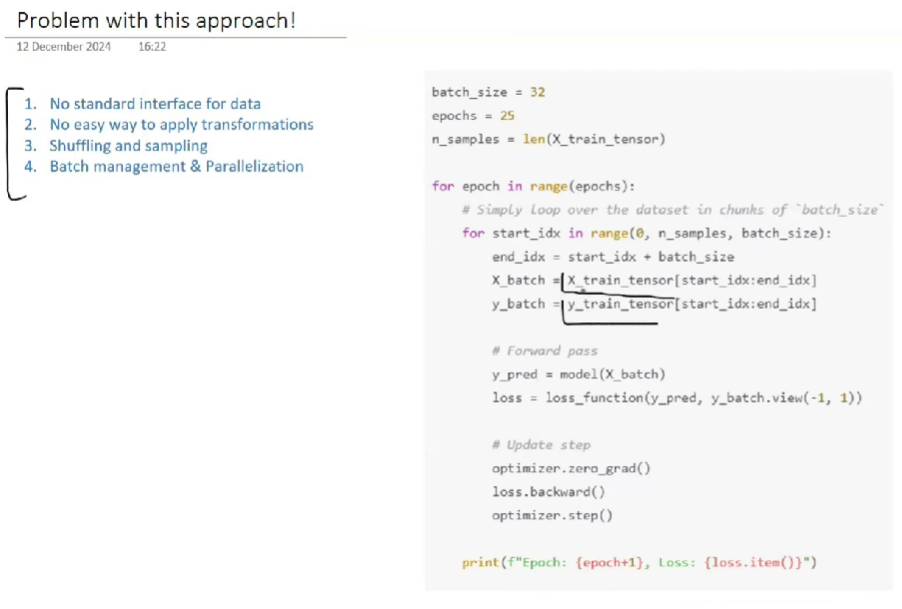

- To solve above issue we have two Datasets and Data loader class of pytorch

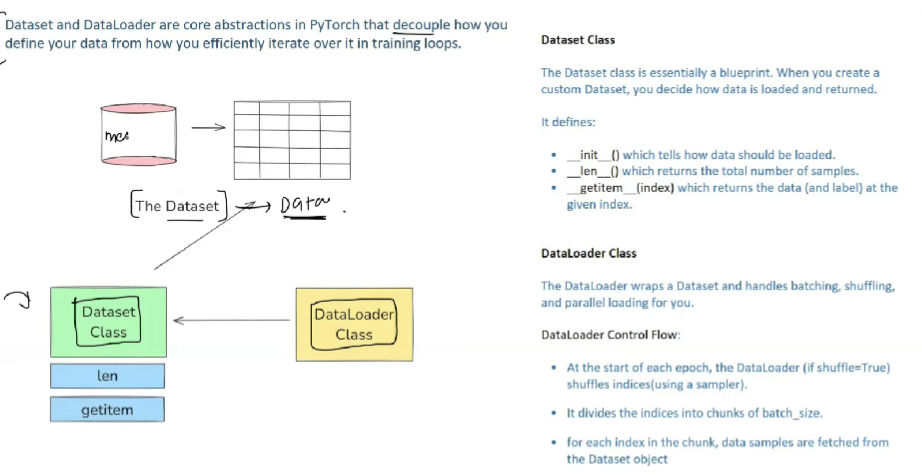

In [1]:
from sklearn.datasets import make_classification
import torch

In [2]:
# Step 1: Create a synthetic classification dataset using sklearn
X, y = make_classification(
    n_samples=10,       # Number of samples
    n_features=2,       # Number of features
    n_informative=2,    # Number of informative features
    n_redundant=0,      # Number of redundant features
    n_classes=2,        # Number of classes
    random_state=42     # For reproducibility
)

In [3]:
X

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [4]:
X.shape

(10, 2)

In [5]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [6]:
y.shape

(10,)

In [7]:
# Convert the data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [8]:
X

tensor([[ 1.0683, -0.9701],
        [-1.1402, -0.8388],
        [-2.8954,  1.9769],
        [-0.7206, -0.9606],
        [-1.9629, -0.9923],
        [-0.9382, -0.5430],
        [ 1.7273, -1.1858],
        [ 1.7774,  1.5116],
        [ 1.8997,  0.8344],
        [-0.5872, -1.9717]])

In [9]:
y

tensor([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [10]:
from torch.utils.data import Dataset, DataLoader

In [11]:
# Creteting Dataset Class to load data
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = features
    self.labels = labels

  def __len__(self):

    return self.features.shape[0] # returns number of row in dataset

  def __getitem__(self, index):

    return self.features[index], self.labels[index]

In [12]:
dataset = CustomDataset(X, y)

In [13]:
len(dataset)

10

In [14]:
dataset[2]

(tensor([-2.8954,  1.9769]), tensor(0))

In [15]:
# Creating Dataloader to make batches
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [16]:
for batch_features, batch_labels in dataloader:

  print(batch_features)
  print(batch_labels)
  print("-"*50)

tensor([[ 1.8997,  0.8344],
        [ 1.7273, -1.1858]])
tensor([1, 1])
--------------------------------------------------
tensor([[-0.5872, -1.9717],
        [-1.9629, -0.9923]])
tensor([0, 0])
--------------------------------------------------
tensor([[ 1.7774,  1.5116],
        [ 1.0683, -0.9701]])
tensor([1, 1])
--------------------------------------------------
tensor([[-1.1402, -0.8388],
        [-0.7206, -0.9606]])
tensor([0, 0])
--------------------------------------------------
tensor([[-0.9382, -0.5430],
        [-2.8954,  1.9769]])
tensor([1, 0])
--------------------------------------------------


### Transformations in Data Loader
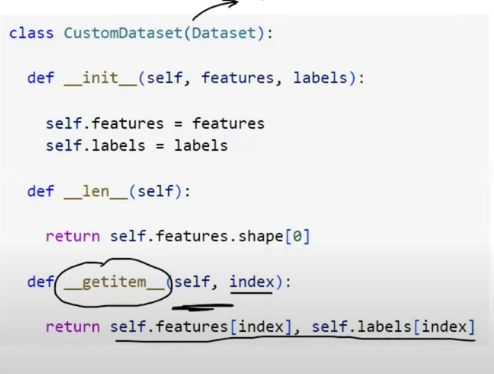

we can make transformations in '__getitem__' before 'return'

**Transformations like**
1. Image:- resize, black/white, data augmentation
2. Textual:- limitization, lower casing


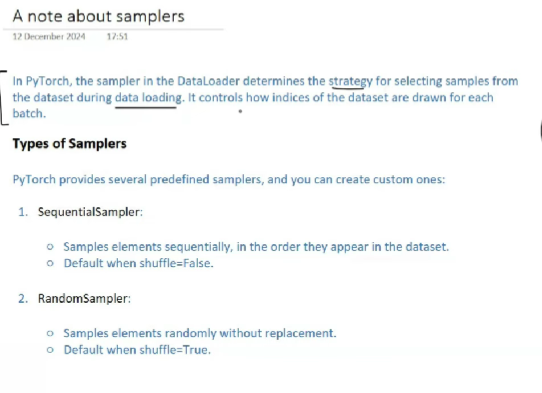

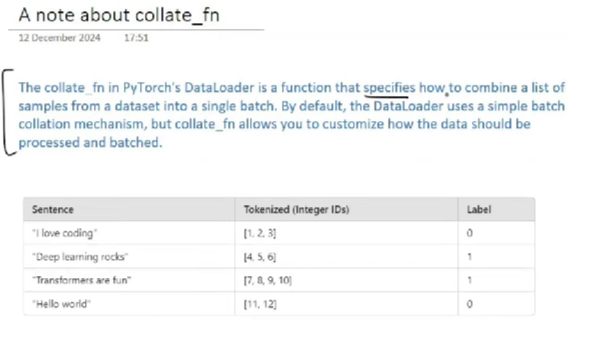

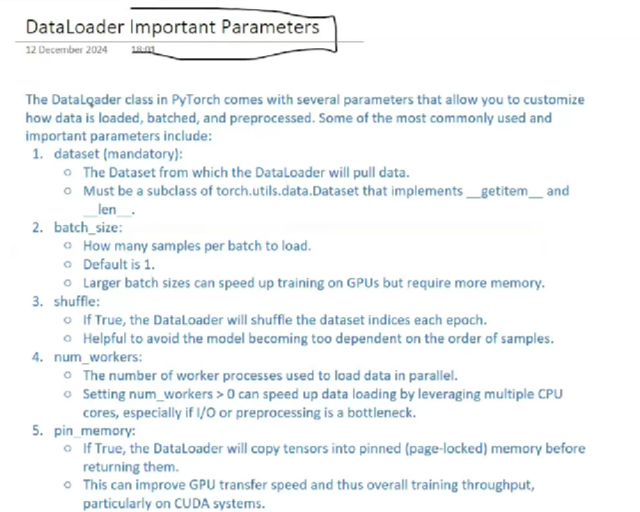

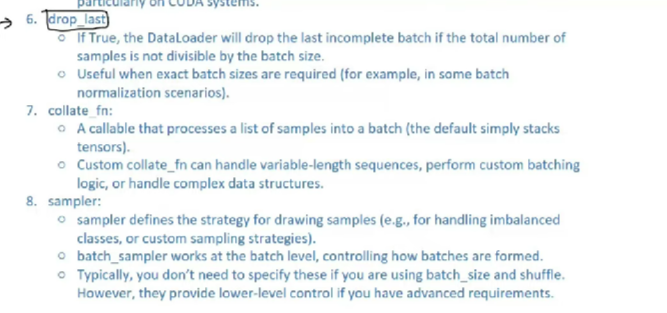

Improving our existing code

In [17]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
df.shape

(569, 33)

In [20]:
df.drop(columns=['id','Unnamed: 32'], inplace=True)

In [21]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2)
#

## Scaling

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[-0.68560766, -0.51744355, -0.71375562, ..., -0.95536147,
        -0.21290331, -0.16736011],
       [ 0.2554044 , -0.72192596,  0.29077783, ...,  0.38420732,
        -0.52298766, -0.35265425],
       [ 0.07005354,  0.17826672,  0.08053625, ...,  1.01066782,
         3.02575543,  0.92110754],
       ...,
       [-1.51597951, -1.13324115, -1.39404616, ..., -1.04140544,
        -1.07424872,  1.30578252],
       [-0.34627301, -1.22960642, -0.34944703, ..., -0.88079003,
        -0.78221161,  0.89943571],
       [-0.97076283, -2.2919748 , -0.98182396, ..., -1.06903009,
        -1.34331662, -0.39599791]])

In [25]:
y_train

,diagnosis
399,B
128,B
199,M
555,B
500,B
...,...
538,B
362,B
71,B
336,B


## Label Encodeing

In [26]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [27]:
y_train

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,

## Numpy arrays to pytorch tensors

In [28]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [29]:
X_train_tensor.shape

torch.Size([455, 30])

In [30]:
y_train_tensor.shape

torch.Size([455])

## Data Set to be loaded

In [31]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset1(Dataset):
  def __init__(self,features,labels):
    self.feature = features
    self.label = labels

  def __len__(self):
    return len(self.label)

  def __getitem__(self,idx):
    return self.feature[idx],self.label[idx]

In [32]:
train_dataset = CustomDataset1(X_train_tensor,y_train_tensor)
test_dataset = CustomDataset1(X_test_tensor,y_test_tensor)

In [33]:
train_dataset[10]

(tensor([ 0.5491,  0.2864,  0.6427,  0.3902,  1.4354,  1.7794,  1.0020,  1.3690,
          1.2807,  1.4853,  0.5357, -0.2771,  0.4300,  0.2695,  0.0061, -0.0390,
         -0.0098,  0.1683, -0.4351,  0.1258,  0.9490,  0.9047,  0.8511,  0.7459,
          1.9628,  1.0145,  0.9240,  1.3654,  1.3080,  1.6200]),
 tensor(1.))

In [34]:
train_loader = DataLoader(train_dataset,batch_size=10,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=10,shuffle=True)

## Defining Model

In [41]:
import torch.nn as nn

class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,features):
    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [42]:
# Important Parameterrs
learning_rate = 0.1
epochs = 25

In [44]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# define loss function
loss_fn = nn.BCELoss()

## Training Pipeline

In [45]:
# define loops
for epoch in range(epochs):

  for batch_features, batch_labels in train_loader:

    # Forward pass
    y_pred = model(batch_features)

    # Loss calculate
    loss = loss_fn(y_pred,batch_labels.view(-1,1))

    # Clear gradient
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # parameters update
    optimizer.step()

  # print loss in each epochs
  print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

Epoch: 1, Loss: 0.3427213430404663
Epoch: 2, Loss: 0.044885337352752686
Epoch: 3, Loss: 0.014004833996295929
Epoch: 4, Loss: 0.03919566422700882
Epoch: 5, Loss: 0.17449936270713806
Epoch: 6, Loss: 0.05841793492436409
Epoch: 7, Loss: 0.039560336619615555
Epoch: 8, Loss: 1.0166327953338623
Epoch: 9, Loss: 0.03450712934136391
Epoch: 10, Loss: 0.02758372388780117
Epoch: 11, Loss: 0.014771802350878716
Epoch: 12, Loss: 0.0667744129896164
Epoch: 13, Loss: 0.0011190290097147226
Epoch: 14, Loss: 0.10970957577228546
Epoch: 15, Loss: 0.013605894520878792
Epoch: 16, Loss: 0.011207717470824718
Epoch: 17, Loss: 0.04770038276910782
Epoch: 18, Loss: 0.052090417593717575
Epoch: 19, Loss: 0.011220978572964668
Epoch: 20, Loss: 0.08876851946115494
Epoch: 21, Loss: 0.014243343845009804
Epoch: 22, Loss: 0.015736065804958344
Epoch: 23, Loss: 0.14612099528312683
Epoch: 24, Loss: 0.04286782070994377
Epoch: 25, Loss: 0.1175728440284729


In [46]:
# Model Evaluation
model.eval()
accuracy_list = []

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    y_pred = model(batch_features)
    y_pred = (y_pred > 0.8).float()

    accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
    accuracy_list.append(accuracy)

overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f"Overall Accuracy: {overall_accuracy}:.4f")

Overall Accuracy: 0.9499999980131785:.4f
